# Big Data Mart Sales Problem

Description: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and 
find out the sales of each product at a particular store. Here we are having 2 datasets - train.csv and test.csv; Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.
Thus here we are predictive model and find out the sales of each product at a particular store.

# Importing Libraries

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
#train test split
from sklearn.model_selection import train_test_split
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Loading the Dataset

In [16]:
train=pd.read_csv("bigdatamart_Train.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
test=pd.read_csv("bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [18]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [19]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [21]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Observation(Train): Here we can see that there are 8523 rows & 12 columns. The min, max and medium values can be analysed from above table.
Observation(Test):Here we can see that there are 5681 rows × 11 columns. The min, max and medium values can be analysed from above table.

In [22]:
#Checking the null values

In [23]:
train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [24]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Thus we can see that there are 1463 null values are present in 'Item_Weight' and 2410 null values present in 'Outlet_Size' feature.

In [25]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Thus we can see that there are 976 null values are present in 'Item_Weight' and 1606 null values present in 'outlet_size' feature.

In [28]:
#Treating NUll Values with Mode & Mean
# as Item_Weight is related to Item_Type thats why filling null values with mean specific to its item_type by applying groupby

In [29]:
from statistics import mode
train['Outlet_Size'].fillna(mode(train['Outlet_Size']),inplace=True)

In [30]:
from statistics import mode
test['Outlet_Size'].fillna(mode(test['Outlet_Size']),inplace=True)

In [31]:
from statistics import mean
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())

In [32]:
from statistics import mean
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())

In [33]:
#crosschecking null values for train and test dataset

In [34]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [35]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
test.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000              reg         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.695633          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58    10.500000          Regular         0.013496   
5677           FDD47     7.600000          Regular         0.142991   
5678           NCO17    10.000000          Low Fat         0.073529   
5679           FDJ26    15.300000          Regular         0.000000   
5680           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1  

Observation(Train):  Thus all null values in train dataset have been filled with mean and mode as executed above for Item_Weight  and  Outlet_Size.

Observation(Test):  Thus all null values in test dataset have been filled with mean and mode as executed above for Item_Weight  and  Outlet_Size.

# EDA

Data visualization

Univariant

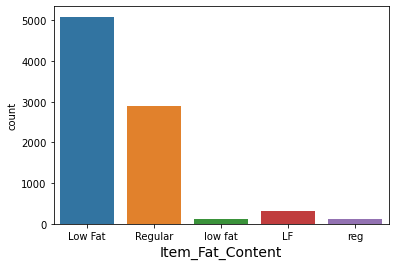

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train)
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

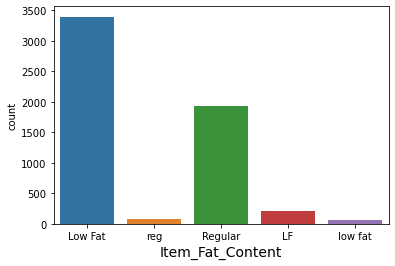

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=test)
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

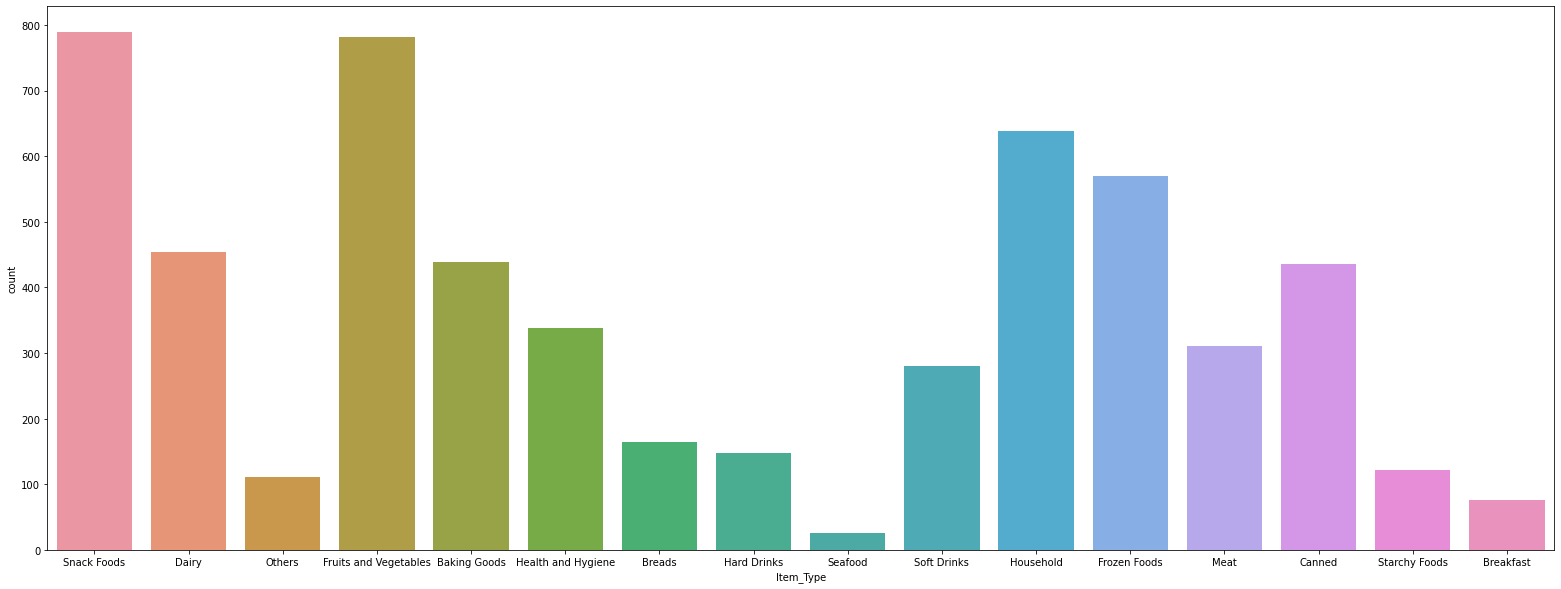

In [40]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=test)
plt.xlabel('Item_Type')
plt.show()

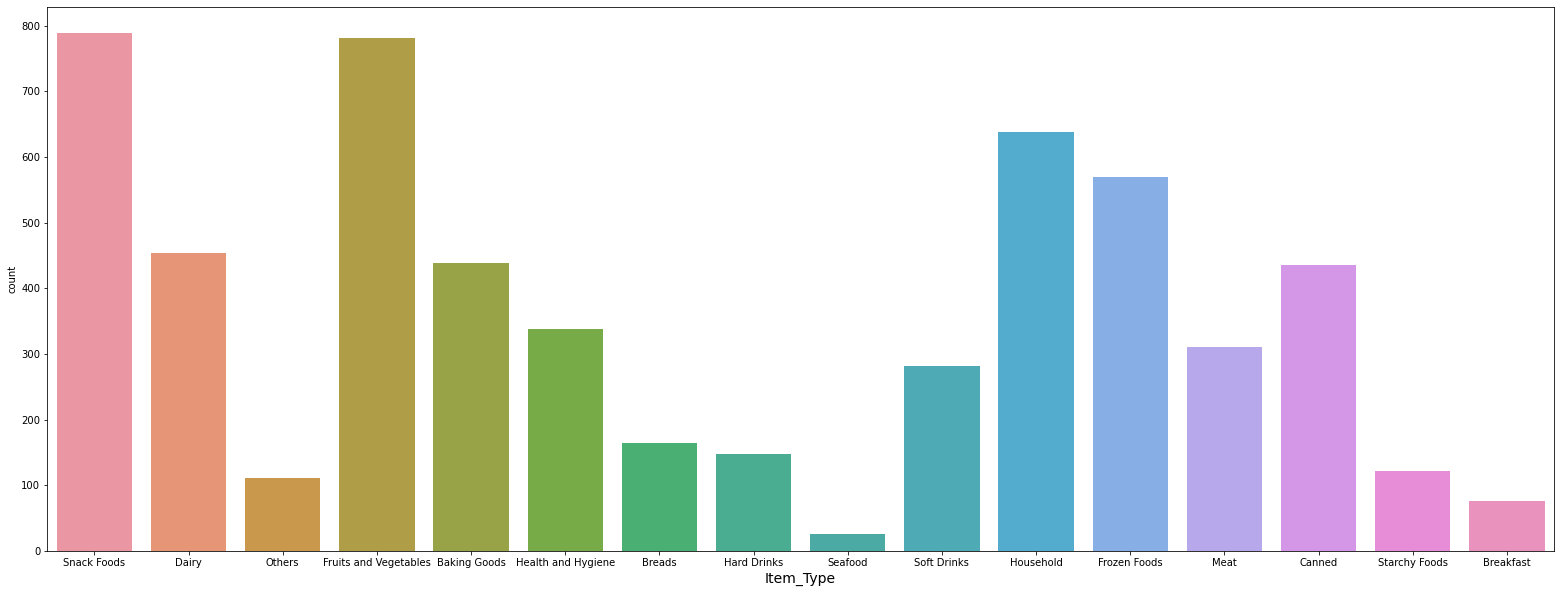

In [41]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=test)
plt.xlabel('Item_Type', fontsize=14)
plt.show()

Bivariant

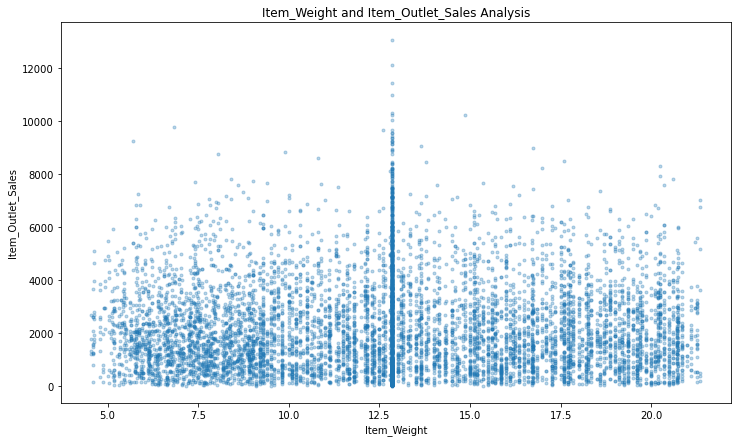

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

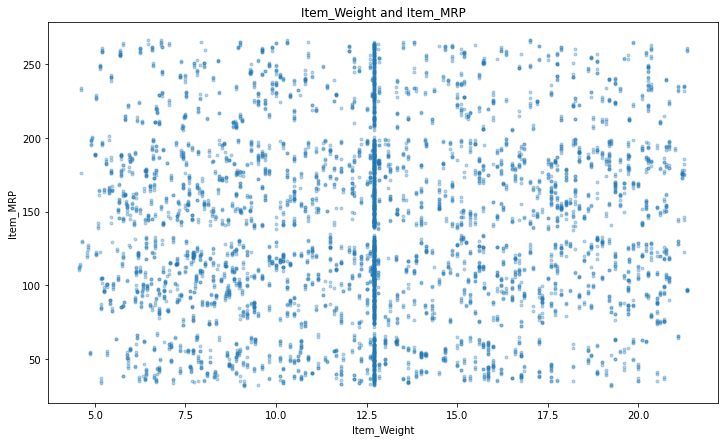

In [43]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_MRP")
plt.title("Item_Weight and Item_MRP")
plt.plot(test.Item_Weight, test["Item_MRP"],'.', alpha = 0.3)

Multivariant

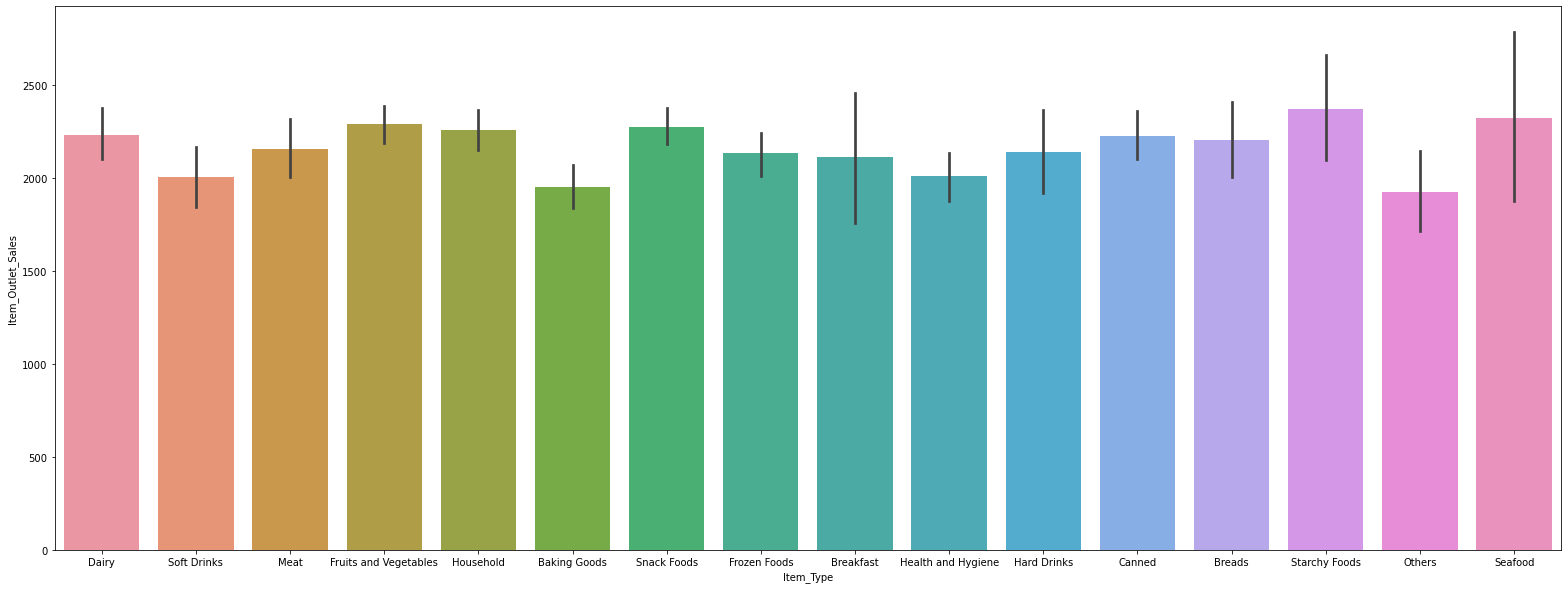

In [44]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train)
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

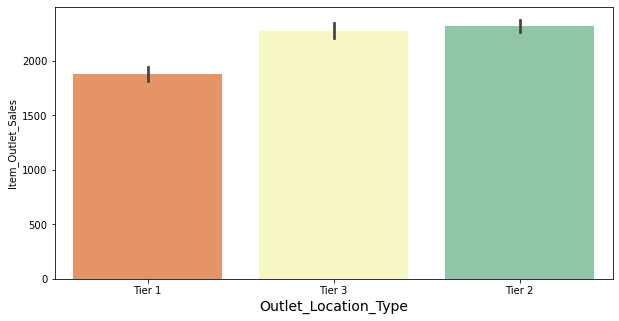

In [45]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.ylabel('Item_Outlet_Sales')
plt.show()

# Correlation Matrix

<AxesSubplot:>

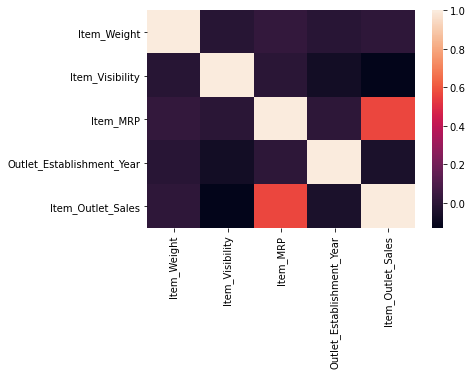

In [46]:
sns.heatmap(train.corr())

From above heatmap we can observe that Item_Outlet_Sales is highly correlated to Item_MRP for train dataset.

# Feature Engineering

We have few columns which need to be deleted and encode them.
All ordinal columns need to be encode. 
The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them. as they 
are not contributing in prediction.

In [47]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [48]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,Supermarket Type1,2778.3834
8519,FDS36,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850
8520,NCJ29,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,Supermarket Type1,1193.1136
8521,FDN46,7.210,2,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976


In [49]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1
1,FDW14,8.300000,4,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,Supermarket Type1
5677,FDD47,7.600000,2,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,Supermarket Type2
5678,NCO17,10.000000,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,Supermarket Type1
5679,FDJ26,15.300000,2,0.000000,Canned,214.6218,OUT017,2007,1,1,Supermarket Type1


In [50]:
#Dropping irrelevant columns

In [51]:
train  = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [52]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.300,1,0.016047,249.8092,1,0,3735.1380
1,5.920,2,0.019278,48.2692,1,2,443.4228
2,17.500,1,0.016760,141.6180,1,0,2097.2700
3,19.200,2,0.000000,182.0950,1,2,732.3800
4,8.930,1,0.000000,53.8614,0,2,994.7052
...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,0,2,2778.3834
8519,8.380,2,0.046982,108.1570,1,1,549.2850
8520,10.600,1,0.035186,85.1224,2,1,1193.1136
8521,7.210,2,0.145221,103.1332,1,2,1845.5976


In [53]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type
0,20.750000,1,0.007565,107.8622,1,0
1,8.300000,4,0.038428,87.3198,1,1
2,14.600000,1,0.099575,241.7538,1,2
3,7.315000,1,0.015388,155.0340,1,1
4,12.695633,2,0.118599,234.2300,1,2
...,...,...,...,...,...,...
5676,10.500000,2,0.013496,141.3154,2,0
5677,7.600000,2,0.142991,169.1448,1,2
5678,10.000000,1,0.073529,118.7440,1,1
5679,15.300000,2,0.000000,214.6218,1,1


# Building Models

In [54]:
y = train['Item_Outlet_Sales']
x = train.drop('Item_Outlet_Sales', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 0)

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1704, 6), (6819, 6), (1704,), (6819,))

In [56]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

# Linear Regression

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_predict=lr.predict(x_test)

In [76]:
lr_MAE = round(MAE(y_test, y_predict),2)
lr_MSE = round(MSE(y_test, y_predict),2)
lr_R_2 = round(R2(y_test, y_predict),4)
lr_CS  = round(CVS(rfr, x, y, cv=5).mean(),4)

In [79]:
print(f" Mean Absolute Error: {lr_MAE}\n")
print(f" Mean Squared Error: {lr_MSE}\n")
print(f" R^2 Score: {lr_R_2}\n")
cross_val(lr,LinearRegression(),x,y,5)

 Mean Absolute Error: 941.89

 Mean Squared Error: 1665668.27

 R^2 Score: 0.4291

LinearRegression() Scores:
0.36
0.35
0.34
0.35
0.33
Average LinearRegression() score: 0.346


In [78]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv") 

# Random Forest Regressor

In [64]:
rfr=RandomForestRegressor()

In [65]:
rfr.fit(x_train, y_train)
y_predict = rfr.predict(x_test)

In [66]:
rfr_MAE = round(MAE(y_test, y_predict),2)
rfr_MSE = round(MSE(y_test, y_predict),2)
rfr_R_2 = round(R2(y_test, y_predict),4)
rfr_CS  = round(CVS(rfr, x, y, cv=5).mean(),4)

In [67]:
print(f" Mean Absolute Error: {rfr_MAE}\n")
print(f" Mean Squared Error: {rfr_MSE}\n")
print(f" R^2 Score: {rfr_R_2}\n")
cross_val(rfr,RandomForestRegressor(),x,y,5)

 Mean Absolute Error: 941.89

 Mean Squared Error: 1665668.27

 R^2 Score: 0.4291

RandomForestRegressor() Scores:
0.52
0.49
0.47
0.49
0.51
Average RandomForestRegressor() score: 0.4957


In [68]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")  

# Saving The Model

In [80]:
import pickle
filename='model.pkl'

In [81]:
pickle.dump(rfr,open(filename,'wb'))

In [82]:
#Load the model

In [83]:
fitted_model=pickle.load(open("model.pkl","rb"))

In [84]:
fitted_model

RandomForestRegressor()

In [85]:
#prediction over test data
predictions=fitted_model.predict(test)

In [86]:
predictions

array([1933.170274, 1481.531502, 2745.219902, ..., 2124.394692,
       3215.501074,  876.75873 ])

# Conclusion

We can conclude that Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).
Linear Regression have the best perfomance in most categories; but here we can see that RandonForestRegressor giving the good accuracy
amongst both.
